# Procesado Inicial

## Limpieza y procesado

Como este apartado se realizo en la primera entrega "MD005_DidacPiferrerIglesias_Agrupacion.ipynb" se colocará una celda completa que realice todas las limpieza y operaciones.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

C:\Users\Didac\AppData\Local\Temp\ipykernel_14984\1932699180.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
df = pd.read_csv("global-economy-indicators/Global Economy Indicators.csv")
#df = pd.read_csv("sample_data/Global Economy Indicators.csv")

df.columns=df.columns.str.strip()

#Vamos a crear un diccionario que nos asocie los nombre originales con los nuevos nombres abreviados
data_names = {}
for col in df.columns:
    primeras_letras = []
    for palabra in col.split():
        if palabra[0] == "(": #Aqui podemos añadir más caracteres que queramos para nuestro diccionario
            break
        else:
            if len(col.split()) > 1:
                primeras_letras.append(palabra[0])
            else:
                primeras_letras.append(palabra)

    key = ''.join(primeras_letras)
    data_names[key] = col
if len(set(data_names)) == len(data_names):
    print("Ready to create a dictionary:")
    print(data_names)
else:
    pass
    #Aquí deberíamos, en caso de que fuera necesario, separar los elementos que son iguales, y añadirles distintos valores hasta hacerlos únicos.

#definimos una función que nos permita obtener el valor del diccionario a traves del valor del diccionario
def get_key_from_value(diccionario,value):
    for k,v in diccionario.items():
        if v == value:
            return k
    return "None" #si el valor no se encuentra

#Renombramos todas las cabeceras de las columnas con los nuevos nombres
for col in df.columns:
    new_name = get_key_from_value(data_names,col)
    df.rename(columns = {col: new_name},inplace=True)

if not "None" in df.columns: print("Rename Succesfull")

#Tenemos espacios extras, por lo tanto tenemos que limpiar también estos datos
df['Country']=df['Country'].str.strip()
df['Currency']=df['Currency'].str.strip()

#Prevenir malos formatos en los numeros
for col in df.select_dtypes(['float64']):
    df[col]=pd.to_numeric(df[col])
df


Ready to create a dictionary:
{'CountryID': 'CountryID', 'Country': 'Country', 'Year': 'Year', 'Aer': 'AMA exchange rate', 'Iber': 'IMF based exchange rate', 'Population': 'Population', 'Currency': 'Currency', 'PcG': 'Per capita GNI', 'Ahff': 'Agriculture, hunting, forestry, fishing (ISIC A-B)', 'Cii': 'Changes in inventories', 'C': 'Construction (ISIC F)', 'Eogas': 'Exports of goods and services', 'Fce': 'Final consumption expenditure', 'Ggfce': 'General government final consumption expenditure', 'Gcf': 'Gross capital formation', 'Gfcf': 'Gross fixed capital formation (including Acquisitions less disposals of valuables)', 'Hce': 'Household consumption expenditure (including Non-profit institutions serving households)', 'Iogas': 'Imports of goods and services', 'M': 'Manufacturing (ISIC D)', 'MMU': 'Mining, Manufacturing, Utilities (ISIC C-E)', 'OA': 'Other Activities (ISIC J-P)', 'TVA': 'Total Value Added', 'Tsac': 'Transport, storage and communication (ISIC I)', 'Wrtrah': 'Wholesale,

,CountryID,Country,Year,Aer,Iber,Population,Currency,PcG,Ahff,Cii,...,Hce,Iogas,M,MMU,OA,TVA,Tsac,Wrtrah,GNIiU,GDP
0,4,Afghanistan,1970,0.044998,0.044998,10752971,Afghani,164,8.699174e+08,NaN,...,1.551094e+09,1.952772e+08,3.701468e+08,3.766908e+08,1.277478e+08,1.731454e+09,8.391720e+07,2.263871e+08,1.766528e+09,1.731436e+09
1,4,Afghanistan,1971,0.044998,0.044998,11015857,Afghani,168,9.108281e+08,NaN,...,1.675426e+09,2.762965e+08,3.875495e+08,3.944012e+08,1.337541e+08,1.812857e+09,8.786038e+07,2.370192e+08,1.850122e+09,1.812838e+09
2,4,Afghanistan,1972,0.044998,0.044998,11286753,Afghani,149,8.279453e+08,NaN,...,1.498812e+09,2.903704e+08,3.522847e+08,3.585129e+08,1.215827e+08,1.647918e+09,7.986452e+07,2.154773e+08,1.683948e+09,1.647900e+09
3,4,Afghanistan,1973,0.044998,0.044998,11575305,Afghani,150,8.554869e+08,NaN,...,1.508024e+09,2.629629e+08,3.640103e+08,3.704458e+08,1.256302e+08,1.702735e+09,8.252888e+07,2.226243e+08,1.739998e+09,1.702716e+09
4,4,Afghanistan,1974,0.044998,0.044998,11869879,Afghani,177,1.035913e+09,NaN,...,1.778819e+09,3.056792e+08,4.407604e+08,4.485528e+08,1.521192e+08,2.061752e+09,9.991860e+07,2.695259e+08,2.106420e+09,2.061729e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10507,894,Zambia,2017,9.519501,9.519501,17298054,Kwacha,1448,1.041005e+09,567729313.0,...,1.215309e+10,9.465895e+09,2.102369e+09,7.194153e+09,6.187124e+09,2.416662e+10,1.965026e+09,5.323590e+09,2.505604e+10,2.586816e+10
10508,894,Zambia,2018,10.458143,10.458143,17835893,Kwacha,1451,8.791160e+08,929063411.0,...,1.183200e+10,9.717269e+09,1.801783e+09,6.556884e+09,5.791375e+09,2.422570e+10,2.490720e+09,5.990720e+09,2.588455e+10,2.631198e+10
10509,894,Zambia,2019,12.889418,12.889418,18380477,Kwacha,1246,6.668385e+08,817104395.0,...,9.848112e+09,7.961415e+09,1.582484e+09,5.584425e+09,5.231062e+09,2.153971e+10,2.537646e+09,4.959277e+09,2.291011e+10,2.331036e+10
10510,894,Zambia,2020,18.344093,18.344093,18927715,Kwacha,928,5.391694e+08,439295787.0,...,6.969267e+09,5.892353e+09,1.397303e+09,4.269405e+09,4.217431e+09,1.718020e+10,2.258715e+09,3.234123e+09,1.756233e+10,1.811064e+10


In [4]:
df.isna().sum()

CountryID        0
Country          0
Year             0
Aer              0
Iber             0
Population       0
Currency         0
PcG              0
Ahff           121
Cii           1841
C                0
Eogas           21
Fce              0
Ggfce           52
Gcf             52
Gfcf            52
Hce             52
Iogas           42
M               43
MMU              0
OA               0
TVA              0
Tsac            49
Wrtrah          49
GNIiU            0
GDP              0
dtype: int64

# Algoritmos

## Parametrización de los datos y selección del subset de datos

In [5]:

def transform_data(df,year,num_countries):
    def wp_calculation(country):
        if country in top10:
            return 1 #True
        else:
            return 0 #False
        
    df_f = df[df['Year'] >= year]

    #wsc (without some countries)
    dicc_pais = dict(zip(df_f['CountryID'], df_f['Country']))
    print(dicc_pais)
    countries_to_delete = ['China, Macao SAR','Monaco','Sint Maarten (Dutch part)','D.P.R. of Korea','Kiribati']

    #también de igual forma que en la anterior entrega una vez creado nuestro diccionario, podemos eliminar las variables categoricas Currency y Country
    df_wsc = df_f[~df_f['Country'].isin(countries_to_delete)].drop(['Cii','Country','Currency'], axis = 1)

    #Seleccionamos las 10 potencias en los últimos 6 años del dataset
    media_GDP = df_wsc.groupby('CountryID')['GDP'].mean()
    print(media_GDP.shape)
    top10 = media_GDP.nlargest(num_countries)
    #print(top10)
    df_wsc['WP'] = df_wsc['CountryID'].apply(wp_calculation)

    #creamos las llaves disponibles que tenemos que no forman parte del top10
    random.seed(42)
    key_availables = [key for key in dicc_pais.keys() if key not in top10]
    #print(key_availables)

    non_wp = random.sample(key_availables,num_countries)

    #a continuación vamos a extrer los countryID del top10 y los vamos a juntar con los otros seleccionados

    wp_keys = [key for key,val in top10.items()]

    total_wp_nonwp = non_wp + wp_keys
    total_wp_nonwp

    df_fy_final = df_wsc[df_wsc['CountryID'].isin(total_wp_nonwp)]

    #antes de realizar nada, eliminamos nuestra variable CountryID que todo y que sea numerica es un ID asignado 
    #por el dataset que solo añade ruido al dataset.
    #df_fy_final= df_fy_final.drop(['CountryID'],axis=1)
    return df_fy_final

In [6]:
#Como se han tenido que probar diferentes sets de datos, se ha creado esta celda para ir variando desde que año queríamos los datos
#y cuantos países queríamos contemplar como potencia mundial.
year = 2010 # 2000 para adelante
num_countries = 10 # 10 paises considerados potencia mundial
df_fy_final = transform_data(df,year,num_countries)

{4: 'Afghanistan', 8: 'Albania', 12: 'Algeria', 20: 'Andorra', 24: 'Angola', 28: 'Antigua and Barbuda', 31: 'Azerbaijan', 32: 'Argentina', 36: 'Australia', 40: 'Austria', 44: 'Bahamas', 48: 'Bahrain', 50: 'Bangladesh', 51: 'Armenia', 52: 'Barbados', 56: 'Belgium', 60: 'Bermuda', 64: 'Bhutan', 68: 'Bolivia (Plurinational State of)', 70: 'Bosnia and Herzegovina', 72: 'Botswana', 76: 'Brazil', 84: 'Belize', 90: 'Solomon Islands', 92: 'British Virgin Islands', 96: 'Brunei Darussalam', 100: 'Bulgaria', 104: 'Myanmar', 108: 'Burundi', 112: 'Belarus', 116: 'Cambodia', 120: 'Cameroon', 124: 'Canada', 132: 'Cabo Verde', 136: 'Cayman Islands', 140: 'Central African Republic', 144: 'Sri Lanka', 148: 'Chad', 152: 'Chile', 156: 'China', 170: 'Colombia', 174: 'Comoros', 178: 'Congo', 180: 'D.R. of the Congo', 184: 'Cook Islands', 188: 'Costa Rica', 191: 'Croatia', 192: 'Cuba', 196: 'Cyprus', 203: 'Czechia', 204: 'Benin', 208: 'Denmark', 212: 'Dominica', 214: 'Dominican Republic', 218: 'Ecuador', 222

## Regresión Exponencial decreciente

Vistos los datos que se han usado para las anteriores entregas, en esta se ha decido continuar con las mismas variables que en la anterior entrega funcionaron ['Aer', 'Ahff']. Como se verá en el plot de abajo, la función no lineal parece seguir una exponencial decreciente, así que se ha intentado aplicar a través de la función curve_fit y especificandole que se trata de una función exponencial decreciente modelar este comportamiento.

In [7]:
from scipy.optimize import curve_fit

In [8]:
mydf = df_fy_final
#Escogemos nuestras variables
twoVar = ['Ahff', 'Aer', 'WP']
mydf = mydf[twoVar]

#verificamos que con los parametros escogidos no encontramos nulos
mydf.isna().sum()

Ahff    0
Aer     0
WP      0
dtype: int64

c:\Python311\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Python311\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


<Figure size 500x2000 with 0 Axes>

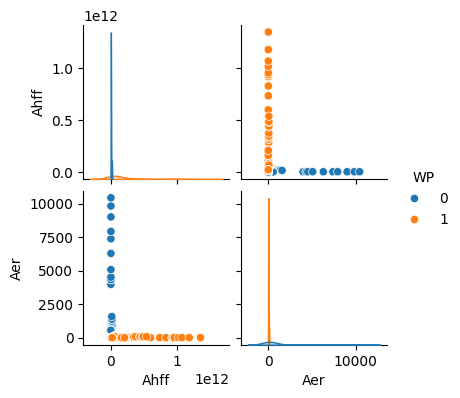

In [9]:
#Hacemos un primer plot para ver que forma tienen nuestros datos
plt.figure(figsize = (5, 20))
sns.pairplot(mydf, height=2, hue = 'WP',palette = "tab10")
plt.show()

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
#Quitamos los outliers antes de normalizar
#Para quitarlos necesitamos calcular los quantiles
resumen = mydf.describe()
resumen


,Ahff,Aer,WP
count,2.400000e+02,240.000000,240.000000
mean,9.541599e+10,428.518744,0.500000
std,2.221763e+11,1503.157926,0.501045
min,3.294000e+06,0.297851,0.000000
25%,2.452089e+09,0.893276,0.000000
50%,1.716856e+10,2.700000,0.500000
75%,5.601942e+10,75.522289,1.000000
max,1.350000e+12,10439.425320,1.000000


Como se puede ver en la tabla anterior, nuestro máximo en Aer es muy máximo, y esto hace que el 3er quartil se dispare mucho.

In [12]:
#Para quitarlos definimos los limites de lo que consideramos outliers, y aplicamos la formula que definen los outliers
Q1_Ahff = resumen.loc['25%', 'Ahff']
Q3_Ahff = resumen.loc['75%', 'Ahff']
IQR_Ahff = Q3_Ahff - Q1_Ahff

Q1_Aer = resumen.loc['25%', 'Aer']
Q3_Aer= resumen.loc['75%', 'Aer']
IQR_Aer = Q3_Aer - Q1_Aer

lim_inf_Af = Q1_Ahff - 1.5 * IQR_Ahff
lim_sup_Af = Q3_Ahff + 1.5 * IQR_Ahff

lim_inf_Ar = Q1_Aer - 1.5 * IQR_Aer
lim_sup_Ar = Q3_Aer + 1.5 * IQR_Aer


df_without_outliers = mydf[(mydf['Ahff'] >= lim_inf_Af) & (df['Ahff'] <= lim_sup_Af)]
df_without_outliers = df_without_outliers[(df_without_outliers['Aer'] >= lim_inf_Ar) & (df['Aer'] <= lim_sup_Ar)]

C:\Users\Didac\AppData\Local\Temp\ipykernel_14984\1544024670.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_without_outliers = mydf[(mydf['Ahff'] >= lim_inf_Af) & (df['Ahff'] <= lim_sup_Af)]
C:\Users\Didac\AppData\Local\Temp\ipykernel_14984\1544024670.py:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_without_outliers = df_without_outliers[(df_without_outliers['Aer'] >= lim_inf_Ar) & (df['Aer'] <= lim_sup_Ar)]


In [13]:
def standarize(df):
    #Estandarizamos nuestros datos, ya que sino los valores quedán muy desproporcionados
    scaler = StandardScaler()
    scaler.fit(df)
    data_scaled = scaler.transform(df)
    df_scaled = pd.DataFrame(data_scaled, columns=[f'{i}' for i in df.columns])
    return df_scaled

In [14]:
df_sO = mydf.iloc[:, :-1] #cogemos todas las columnas, excepto la última
df_nO = df_without_outliers.iloc[:, :-1] #cogemos todas las columnas, excepto la última

print(df_sO)
print(df_nO)
df_sO_scaled = standarize(df_sO)
df_nO_scaled = standarize(df_nO)


               Ahff       Aer
332    2.921074e+09  0.802650
333    3.347531e+09  0.789686
334    3.581387e+09  0.785645
335    3.979651e+09  0.784541
336    4.002308e+09  0.784347
...             ...       ...
10140  1.750000e+11  1.000000
10141  1.740000e+11  1.000000
10142  1.600000e+11  1.000000
10143  1.620000e+11  1.000000
10144  2.070000e+11  1.000000

[240 rows x 2 columns]
               Ahff       Aer
332    2.921074e+09  0.802650
333    3.347531e+09  0.789686
334    3.581387e+09  0.785645
335    3.979651e+09  0.784541
336    4.002308e+09  0.784347
...             ...       ...
10004  1.589699e+10  0.777003
10005  1.631710e+10  0.749582
10006  1.727115e+10  0.783445
10007  1.741155e+10  0.780000
10008  2.113154e+10  0.727065

[167 rows x 2 columns]


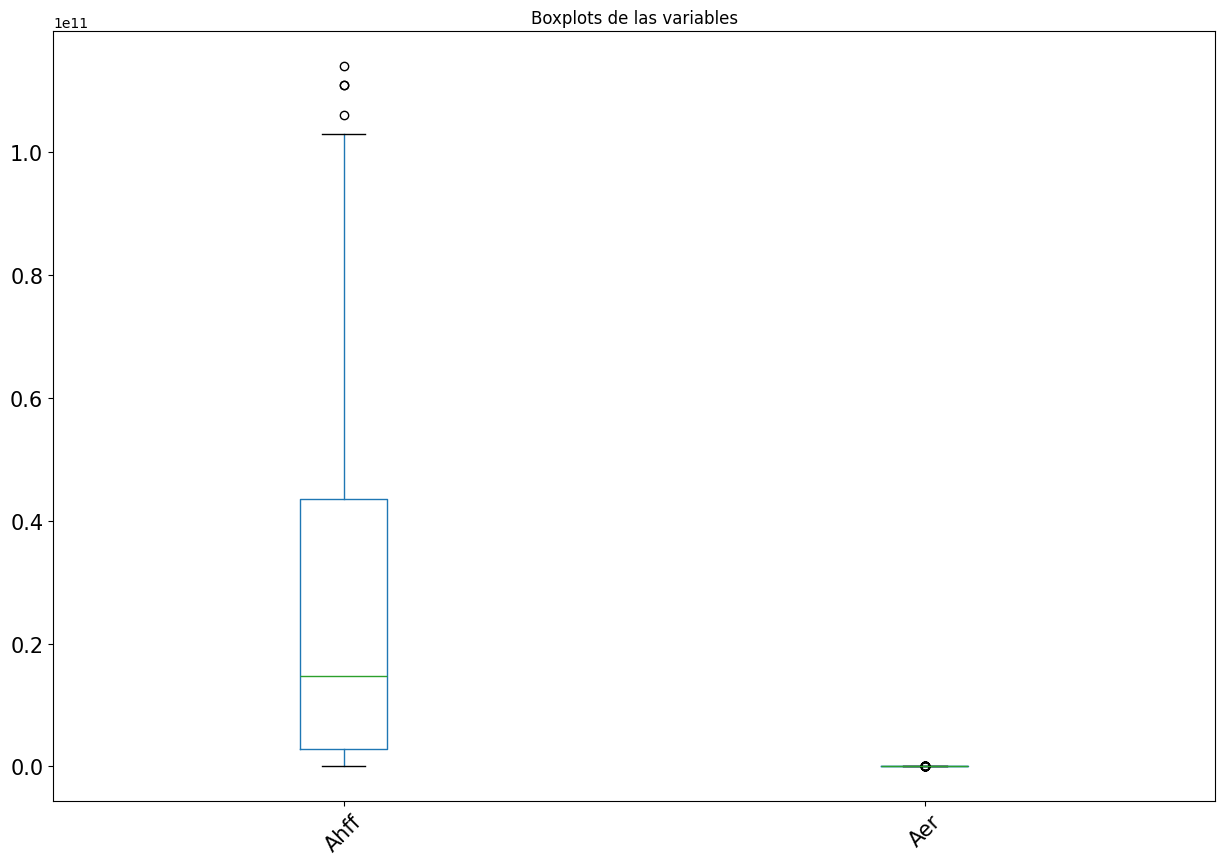

In [15]:
#Vemos que se han tenido mucho problemas debido a que hay muchos outliers, procedemos a analizarlos y a ver como los podemos tratar
plt.figure(figsize = (15, 10))
plt.title("Boxplots de las variables")
df_nO.boxplot(grid=False, rot=45, fontsize=15)
plt.show()

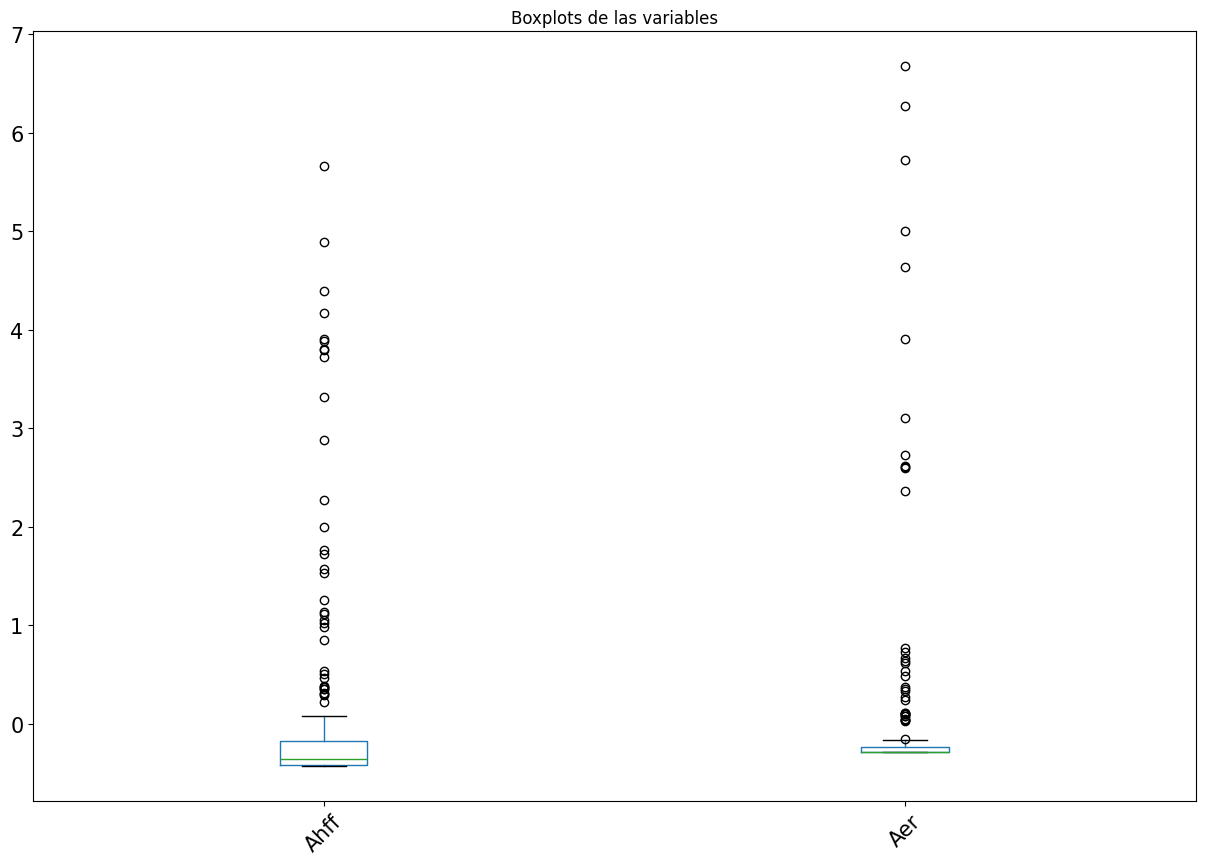

In [16]:
#Visualización de los outliers con los datos escalados
plt.figure(figsize = (15, 10))
plt.title("Boxplots de las variables")
df_sO_scaled.boxplot(grid=False, rot=45, fontsize=15)
plt.show()

Vemos que estos outliers se tratan de paises que son o muy ricos o muy pobres. Los muy ricos son los outliers que se encuentran en la variable Ahff, ya que es una contribución al GDP y contra más elevada más fuerte es economicamente el país, sin embargo, en Aer paso lo contrario. Los casos que tienen una tasa de intercambio muy elevado es debido a que seguramente el país tenga la moneda muy devaluada, por lo tanto la mayoria se tratan de países pobres o no tan potentes economicamente. 



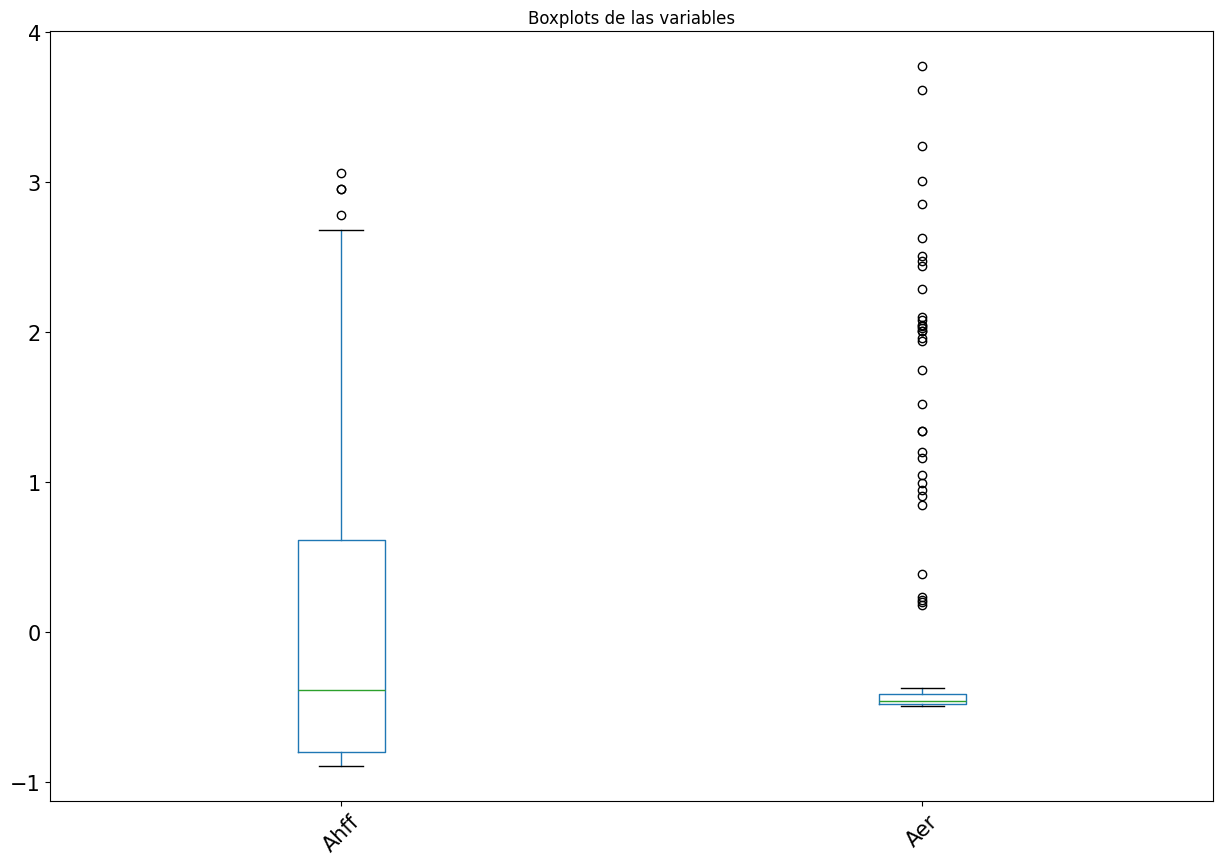

In [17]:
#Vemos el boxplot sin outliers
plt.figure(figsize = (15, 10))
plt.title("Boxplots de las variables")
df_nO_scaled.boxplot(grid=False, rot=45, fontsize=15)
plt.show()

Nuestro nuevo dataset sin los outliers iniciales vemos como todavía tiene outliers, esto es debido al gran desbalance de nuestro dataset, al final estamos tratando con potencias mundiales contra paises que no lo son y que puede ser debido a la aleatoriedad que sean pobres. Se podría hacer una segunda limpieza de estos outliers, pero entonces ya no estaríamos representado el problema, puesto que la sociedad esta distribuida así, unos mucho y otros muy poco.

Una vez ya no tenemos los outliers principales, tenemos que limpiar el dataset de duplicados, ya que no queremos tener puntos repetidos en el dominio de las X.

In [18]:

#Realizaremos lo mismo para el dataset con outliers y para el dataset sin outliers para ver la diferencia del comportamiento del modelo
duplicados_sO = df_sO_scaled.duplicated(subset=['Aer'], keep=False)
df_filtrado_sO = df_sO_scaled[~duplicados_sO]

duplicados_nO = df_nO_scaled.duplicated(subset=['Aer'], keep=False)
df_filtrado_nO = df_nO_scaled[~duplicados_nO]


df_filtrado_nO = df_filtrado_nO.sort_values(by = 'Aer')
df_filtrado_sO = df_filtrado_sO.sort_values(by = 'Aer')

print(df_filtrado_sO.info())
print(df_filtrado_nO.info())

x_sO = df_filtrado_sO.values[:,1]
y_sO = df_filtrado_sO.values[:,0]

x_nO = df_filtrado_nO.values[:,1]
y_nO = df_filtrado_nO.values[:,0]

#verificamos que tenemos un grupo de datos representativo
print("No Outliers")
print(df_filtrado_nO.values.shape)
print("Si Outliers")
print(df_filtrado_sO.values.shape)


<class 'pandas.core.frame.DataFrame'>
Index: 143 entries, 36 to 191
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Ahff    143 non-null    float64
 1   Aer     143 non-null    float64
dtypes: float64(2)
memory usage: 3.4 KB
None
<class 'pandas.core.frame.DataFrame'>
Index: 82 entries, 24 to 46
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Ahff    82 non-null     float64
 1   Aer     82 non-null     float64
dtypes: float64(2)
memory usage: 1.9 KB
None
No Outliers
(82, 2)
Si Outliers
(143, 2)


In [19]:
#Definimos la función del modelo exponencial decreciente
def exp_decreasing(x, a, b, c):
    return a * np.exp(-b * x) + c

def entrenamiento_y_plot(x,y):
    #Ajustamos el modelo exponencial a los datos
    params, covariance = curve_fit(exp_decreasing, x, y)

    #Extraemos los parámetros ajustados
    a_fitted, b_fitted, c_fitted = params

    #Generamos predicciones del modelo ajustado
    y_fitted = exp_decreasing(x, a_fitted, b_fitted, c_fitted)

    print(y_fitted.shape)
    #Visualizar los datos y el modelo ajustado
    plt.figure(figsize=(10, 6))
    plt.scatter(x, y, label='Datos originales')
    plt.plot(x, y_fitted, color='red', label='Modelo ajustado')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Regresión Exponencial Decreciente')
    plt.legend()
    plt.show
    # Mostrar los parámetros ajustados
    return a_fitted, b_fitted, c_fitted


### Con Outliers

(143,)


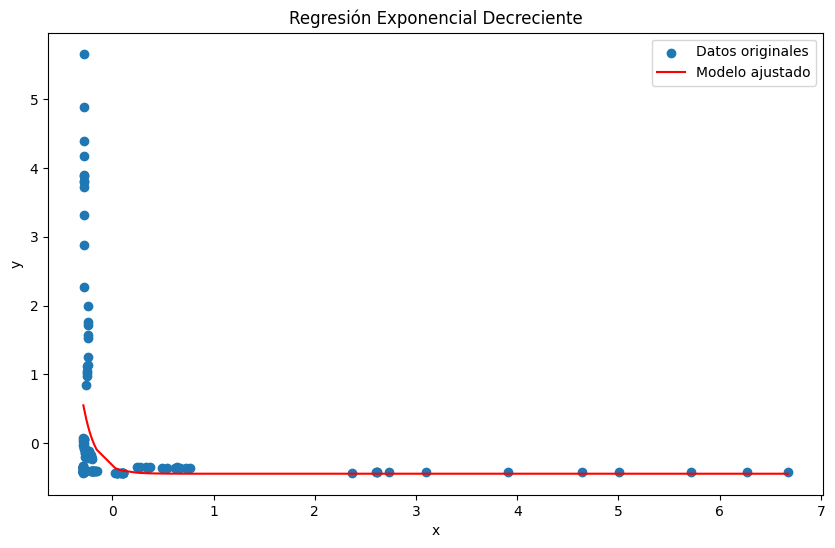

In [20]:
a,b,c = entrenamiento_y_plot(x_sO,y_sO)

In [21]:
y_pred = a * np.exp(-b * x_sO) + c

#Calculamos la suma de cuadrados de los residuos SS_res (variación no explicada por el modelo) y SS_tot (variación total en los datos)
ss_res = np.sum((y_sO - y_pred) ** 2)
ss_tot = np.sum((y_sO - np.mean(y_sO)) ** 2)

#Calculaamos el R^2
r_cuadrado = 1 - (ss_res / ss_tot)

print("R^2:", r_cuadrado)

R^2: 0.09658542591730912


Verificamos pues, que todo y que la curva parece engañar y adaptarse a los datos, la R cuadrado es demasiado pequeña, por lo tanto el modelo no esta siendo capaz de explicar la variablidad de los datos.

### Sin Outliers

(82,)


(961.9451782559732, 3.592148946154718e-05, -961.5974367935695)

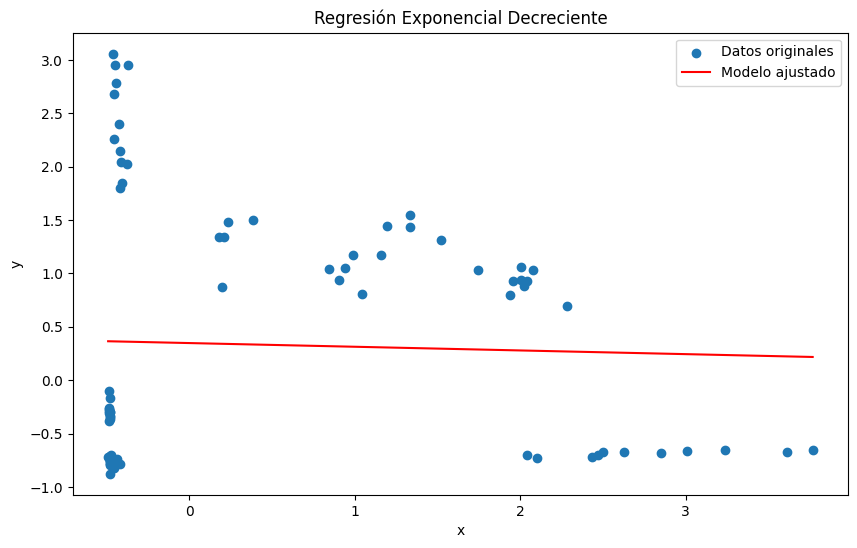

In [22]:
entrenamiento_y_plot(x_nO,y_nO)

c:\Python311\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Python311\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


<Figure size 500x2000 with 0 Axes>

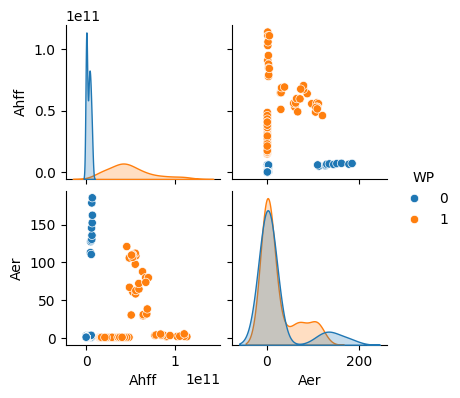

In [23]:
plt.figure(figsize = (5, 20))
sns.pairplot(df_without_outliers, height=2, hue = 'WP',palette = "tab10")
plt.show()

Como conclusión, observamos que para nada se adapta a una exponencial decreciente. Y esto es debido a que los outliers estaban jugando un papel muy importante en la visualización y estaban engañando al ojo. Además cuantos mas datos de más años se cogían, menos forma de exponencial se tenía y aparecen nubes de puntos con una tasa de cambio muy alta pero mucha riqueza.

## Regresión Lineal

In [24]:
year_rl = 2021 #nos quedamos solo con el último año
df_rl = df[df['Year'] >= year_rl]
df_rl.info()

<class 'pandas.core.frame.DataFrame'>
Index: 212 entries, 51 to 10511
Data columns (total 26 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CountryID   212 non-null    int64  
 1   Country     212 non-null    object 
 2   Year        212 non-null    int64  
 3   Aer         212 non-null    float64
 4   Iber        212 non-null    float64
 5   Population  212 non-null    int64  
 6   Currency    212 non-null    object 
 7   PcG         212 non-null    int64  
 8   Ahff        209 non-null    float64
 9   Cii         164 non-null    float64
 10  C           212 non-null    float64
 11  Eogas       212 non-null    float64
 12  Fce         212 non-null    float64
 13  Ggfce       211 non-null    float64
 14  Gcf         211 non-null    float64
 15  Gfcf        211 non-null    float64
 16  Hce         211 non-null    float64
 17  Iogas       212 non-null    float64
 18  M           212 non-null    float64
 19  MMU         212 non-null    flo

In [25]:
df_rl.isna().sum()

CountryID      0
Country        0
Year           0
Aer            0
Iber           0
Population     0
Currency       0
PcG            0
Ahff           3
Cii           48
C              0
Eogas          0
Fce            0
Ggfce          1
Gcf            1
Gfcf           1
Hce            1
Iogas          0
M              0
MMU            0
OA             0
TVA            0
Tsac           0
Wrtrah         0
GNIiU          0
GDP            0
dtype: int64

In [26]:
#Para evitarnos tener que ir limpiando las entradas de nuevo, usaremos la función que nos transformaba los datos, y los clasificaba en potencia mundial o no
#y después le quitaremos la variable WP ya que para este caso no nos interesa

n_co = len(df_rl['CountryID'].unique()) #sabemos que despues del filtrado habrá 207, así que esocgemos la mitad de 206 que es 103, y así no tendrá problema en asignar otros 103 aleatorios. Solo estaremos excluyendo un país
print(n_co)

mydf_clean = transform_data(df_rl,year,103).drop(['WP'],axis=1)

#eliminamos también la columna del año ya que no aporta información
mydf_clean = mydf_clean.drop(['Year'],axis=1)
mydf_clean.info()

212
{4: 'Afghanistan', 8: 'Albania', 12: 'Algeria', 20: 'Andorra', 24: 'Angola', 28: 'Antigua and Barbuda', 31: 'Azerbaijan', 32: 'Argentina', 36: 'Australia', 40: 'Austria', 44: 'Bahamas', 48: 'Bahrain', 50: 'Bangladesh', 51: 'Armenia', 52: 'Barbados', 56: 'Belgium', 60: 'Bermuda', 64: 'Bhutan', 68: 'Bolivia (Plurinational State of)', 70: 'Bosnia and Herzegovina', 72: 'Botswana', 76: 'Brazil', 84: 'Belize', 90: 'Solomon Islands', 92: 'British Virgin Islands', 96: 'Brunei Darussalam', 100: 'Bulgaria', 104: 'Myanmar', 108: 'Burundi', 112: 'Belarus', 116: 'Cambodia', 120: 'Cameroon', 124: 'Canada', 132: 'Cabo Verde', 136: 'Cayman Islands', 140: 'Central African Republic', 144: 'Sri Lanka', 148: 'Chad', 152: 'Chile', 156: 'China', 170: 'Colombia', 174: 'Comoros', 178: 'Congo', 180: 'D.R. of the Congo', 184: 'Cook Islands', 188: 'Costa Rica', 191: 'Croatia', 192: 'Cuba', 196: 'Cyprus', 203: 'Czechia', 204: 'Benin', 208: 'Denmark', 212: 'Dominica', 214: 'Dominican Republic', 218: 'Ecuador',

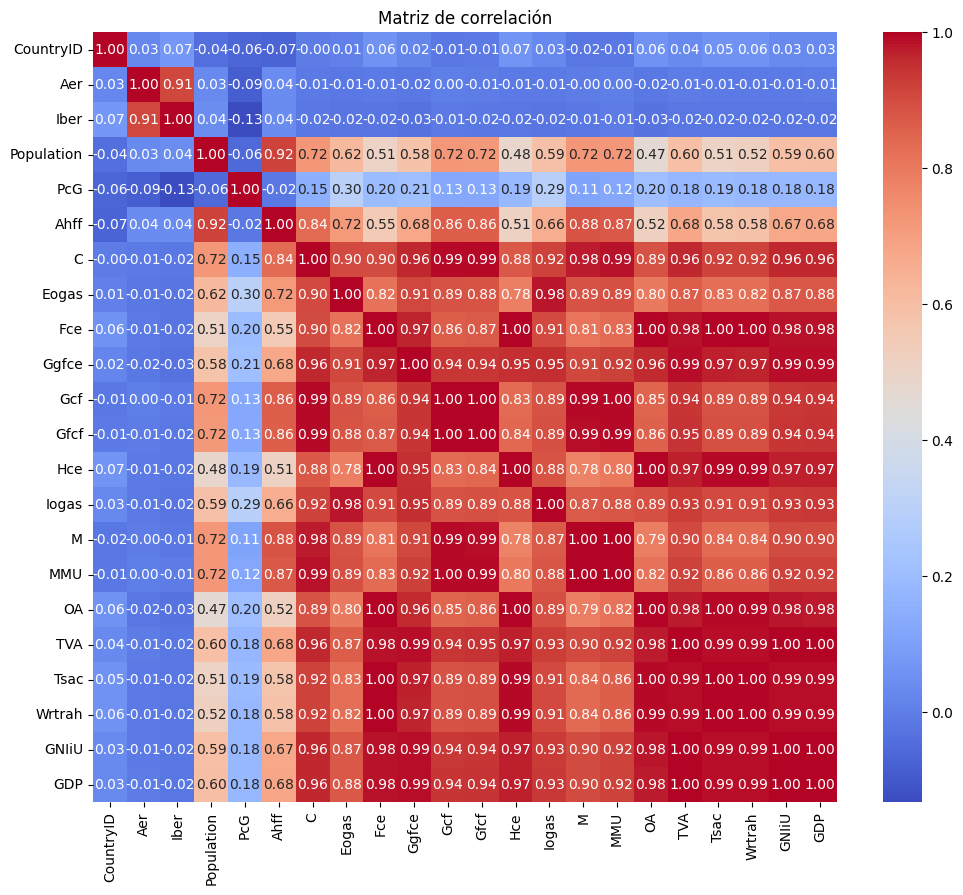

{'CountryID': 'CountryID', 'Country': 'Country', 'Year': 'Year', 'Aer': 'AMA exchange rate', 'Iber': 'IMF based exchange rate', 'Population': 'Population', 'Currency': 'Currency', 'PcG': 'Per capita GNI', 'Ahff': 'Agriculture, hunting, forestry, fishing (ISIC A-B)', 'Cii': 'Changes in inventories', 'C': 'Construction (ISIC F)', 'Eogas': 'Exports of goods and services', 'Fce': 'Final consumption expenditure', 'Ggfce': 'General government final consumption expenditure', 'Gcf': 'Gross capital formation', 'Gfcf': 'Gross fixed capital formation (including Acquisitions less disposals of valuables)', 'Hce': 'Household consumption expenditure (including Non-profit institutions serving households)', 'Iogas': 'Imports of goods and services', 'M': 'Manufacturing (ISIC D)', 'MMU': 'Mining, Manufacturing, Utilities (ISIC C-E)', 'OA': 'Other Activities (ISIC J-P)', 'TVA': 'Total Value Added', 'Tsac': 'Transport, storage and communication (ISIC I)', 'Wrtrah': 'Wholesale, retail trade, restaurants and

In [27]:
#Vemos la matriz de correlación para el año 2021
plt.figure(figsize=(12, 10))
sns.heatmap(mydf_clean.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de correlación')
plt.show()
print(data_names)

In [ ]:
#Para evitarnos tener que ir limpiando las entradas de nuevo, usaremos la función que nos transformaba los datos, y los clasificaba en potencia mundial o no
#y después le quitaremos la variable WP ya que para este caso no nos interesa

n_co = len(df_rl['CountryID'].unique()) #sabemos que despues del filtrado habrá 207, así que esocgemos la mitad de 206 que es 103, y así no tendrá problema en asignar otros 103 aleatorios. Solo estaremos excluyendo un país
print(n_co)

mydf_clean = transform_data(df_rl,year,103).drop(['WP'],axis=1)

#eliminamos también la columna del año ya que no aporta información
mydf_clean = mydf_clean.drop(['Year'],axis=1)
mydf_clean.info()

212
{4: 'Afghanistan', 8: 'Albania', 12: 'Algeria', 20: 'Andorra', 24: 'Angola', 28: 'Antigua and Barbuda', 31: 'Azerbaijan', 32: 'Argentina', 36: 'Australia', 40: 'Austria', 44: 'Bahamas', 48: 'Bahrain', 50: 'Bangladesh', 51: 'Armenia', 52: 'Barbados', 56: 'Belgium', 60: 'Bermuda', 64: 'Bhutan', 68: 'Bolivia (Plurinational State of)', 70: 'Bosnia and Herzegovina', 72: 'Botswana', 76: 'Brazil', 84: 'Belize', 90: 'Solomon Islands', 92: 'British Virgin Islands', 96: 'Brunei Darussalam', 100: 'Bulgaria', 104: 'Myanmar', 108: 'Burundi', 112: 'Belarus', 116: 'Cambodia', 120: 'Cameroon', 124: 'Canada', 132: 'Cabo Verde', 136: 'Cayman Islands', 140: 'Central African Republic', 144: 'Sri Lanka', 148: 'Chad', 152: 'Chile', 156: 'China', 170: 'Colombia', 174: 'Comoros', 178: 'Congo', 180: 'D.R. of the Congo', 184: 'Cook Islands', 188: 'Costa Rica', 191: 'Croatia', 192: 'Cuba', 196: 'Cyprus', 203: 'Czechia', 204: 'Benin', 208: 'Denmark', 212: 'Dominica', 214: 'Dominican Republic', 218: 'Ecuador',

In [28]:
#Aplicamos el treshold a la vairable target que en nuestro caso será la population
th = 0.7

#guardamos la variable countryID simplemente porque con el treshold se borrará
country_df = mydf_clean['CountryID']

high_corr = abs(mydf_clean.corr()['Population']) >= th
high_corr_keys = [k for k, v in zip(high_corr.keys(), high_corr.values) if abs(v) >= th]
mydf_clean_filt = mydf_clean[high_corr_keys]

#añadimos de nuevo la columna country_df al dataset, como solo hemos eliminado columnas, no hemos alterado el orden
mydf_clean_filt['CountryID'] = country_df
mydf_clean_filt.head()

C:\Users\Didac\AppData\Local\Temp\ipykernel_14984\2784296765.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mydf_clean_filt['CountryID'] = country_df


,Population,Ahff,C,Gcf,Gfcf,M,MMU,CountryID
51,40099462,5.002252e+09,3.001111e+08,1.921133e+09,1.921133e+09,1.353586e+09,2.028733e+09,4
155,44177969,1.990389e+10,1.817952e+10,6.200169e+10,5.698407e+10,7.028517e+09,4.639058e+10,12
207,79034,1.768197e+07,2.581331e+08,6.929010e+08,6.571653e+08,1.351044e+08,1.528810e+08,20
259,34503774,8.101381e+09,4.407157e+09,1.480000e+10,1.356777e+10,4.613059e+09,2.911206e+10,24
311,93219,3.195926e+07,1.926963e+08,5.421333e+08,5.421333e+08,3.499259e+07,1.140481e+08,28


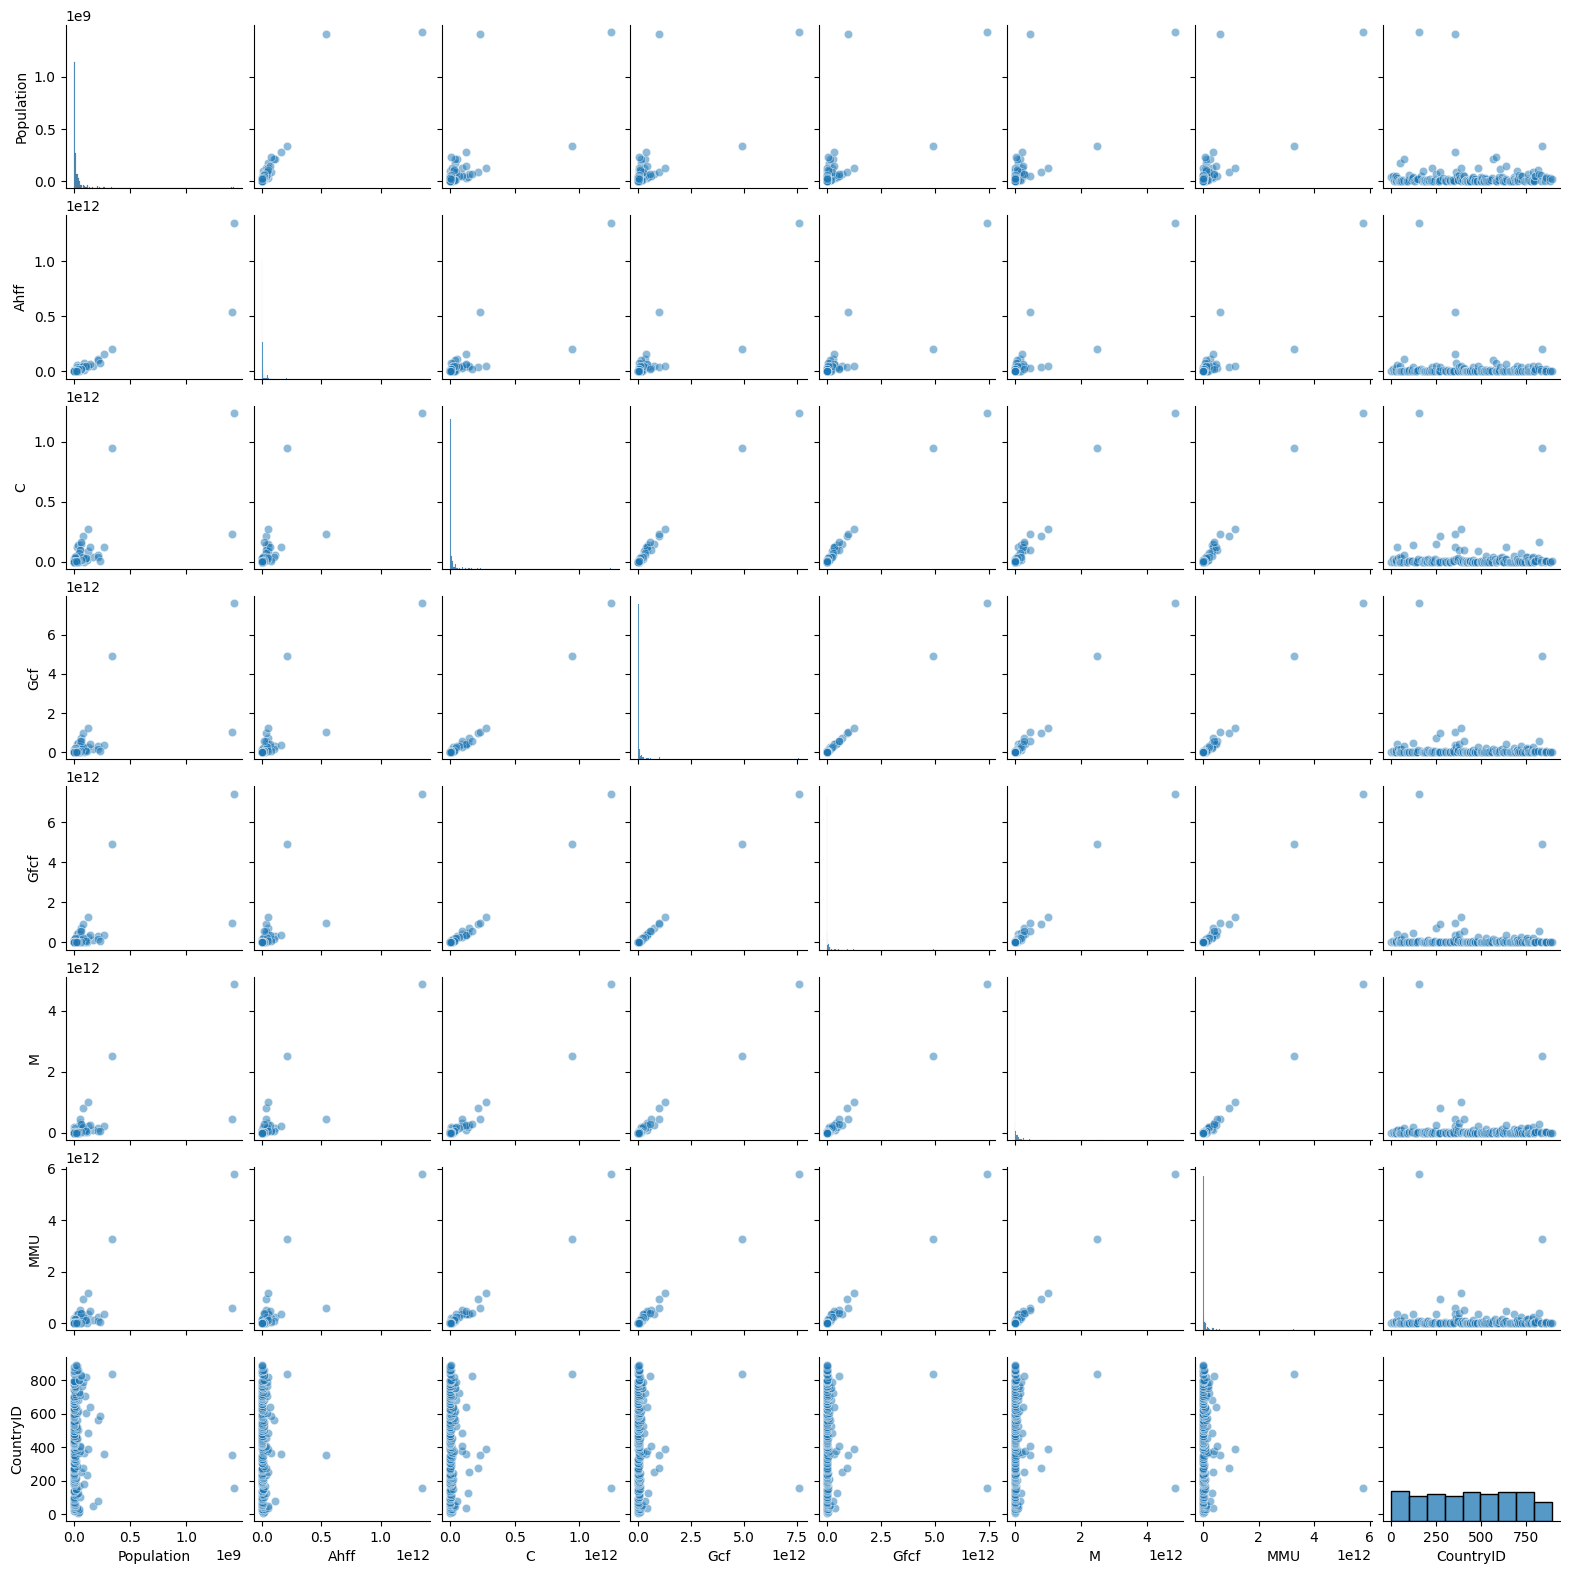

In [29]:
#sns.pairplot(mydf_clean_filt, plot_kws={"alpha": 0.7})
sns.pairplot(mydf_clean_filt, height=2,plot_kws={"alpha": 0.5})

Observamos que tenemos algunos outliers, los verificamos con el boxplot

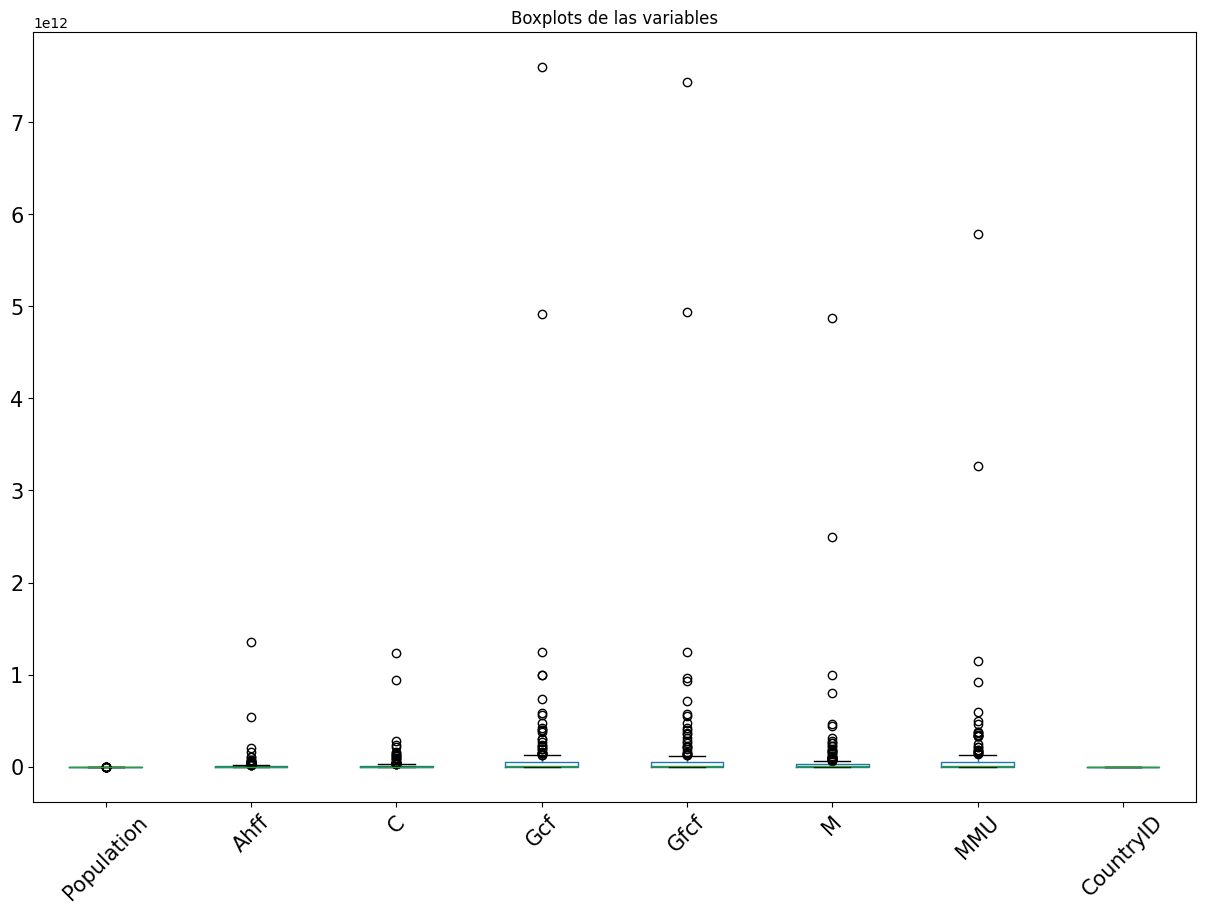

In [30]:
plt.figure(figsize = (15, 10))
plt.title("Boxplots de las variables")
mydf_clean_filt.boxplot(grid=False, rot=45, fontsize=15)
plt.show()

Efectivamente, tenemos muchos outliers así que nos centraremos simplemente en los de la población


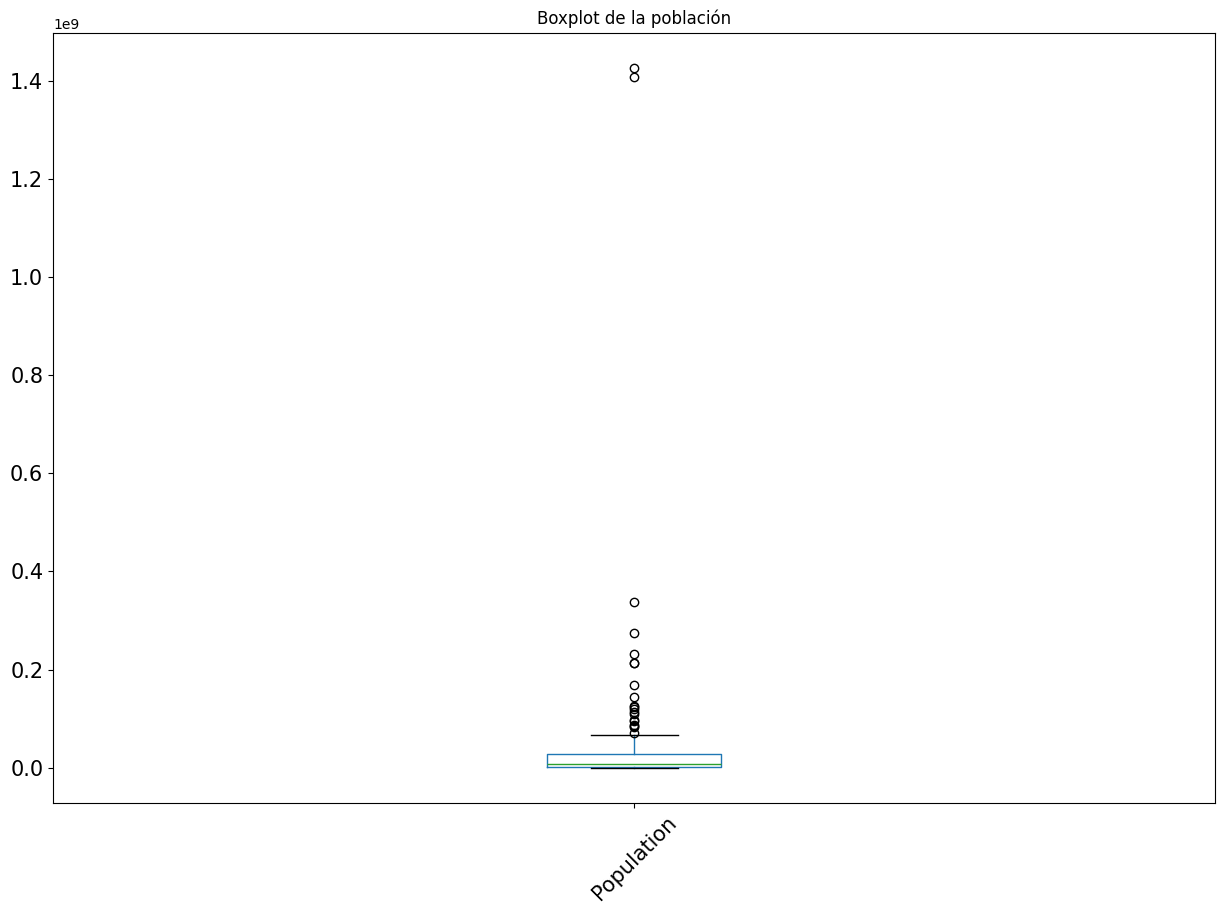

In [31]:
#Como queremos realizarlo con la Población, veremos con detalle los outliers de esta variable
plt.figure(figsize = (15, 10))
plt.title("Boxplot de la población")
popu = mydf_clean_filt[['Population']]
popu.boxplot(grid=False, rot=45, fontsize=15)
plt.show()

In [32]:
resumen_rl = mydf_clean_filt.describe()

In [33]:
#Como tenemos un montón de outliers, los quitaremos todos.
#Para quitarlos definimos los limites de lo que consideramos outliers, y aplicamos la formula que definen los outliers
Q1_popu = resumen_rl.loc['25%', 'Population']
Q3_popu = resumen_rl.loc['75%', 'Population']
IQR_popu = Q3_popu - Q1_popu


lim_inf_popu = Q1_popu - 1.5 * IQR_popu
lim_sup_popu = Q3_popu + 1.5 * IQR_popu

mydf_clean_filt_nO = mydf_clean_filt[(mydf_clean_filt['Population'] >= lim_inf_popu) & (mydf_clean_filt['Population'] <= lim_sup_popu)]


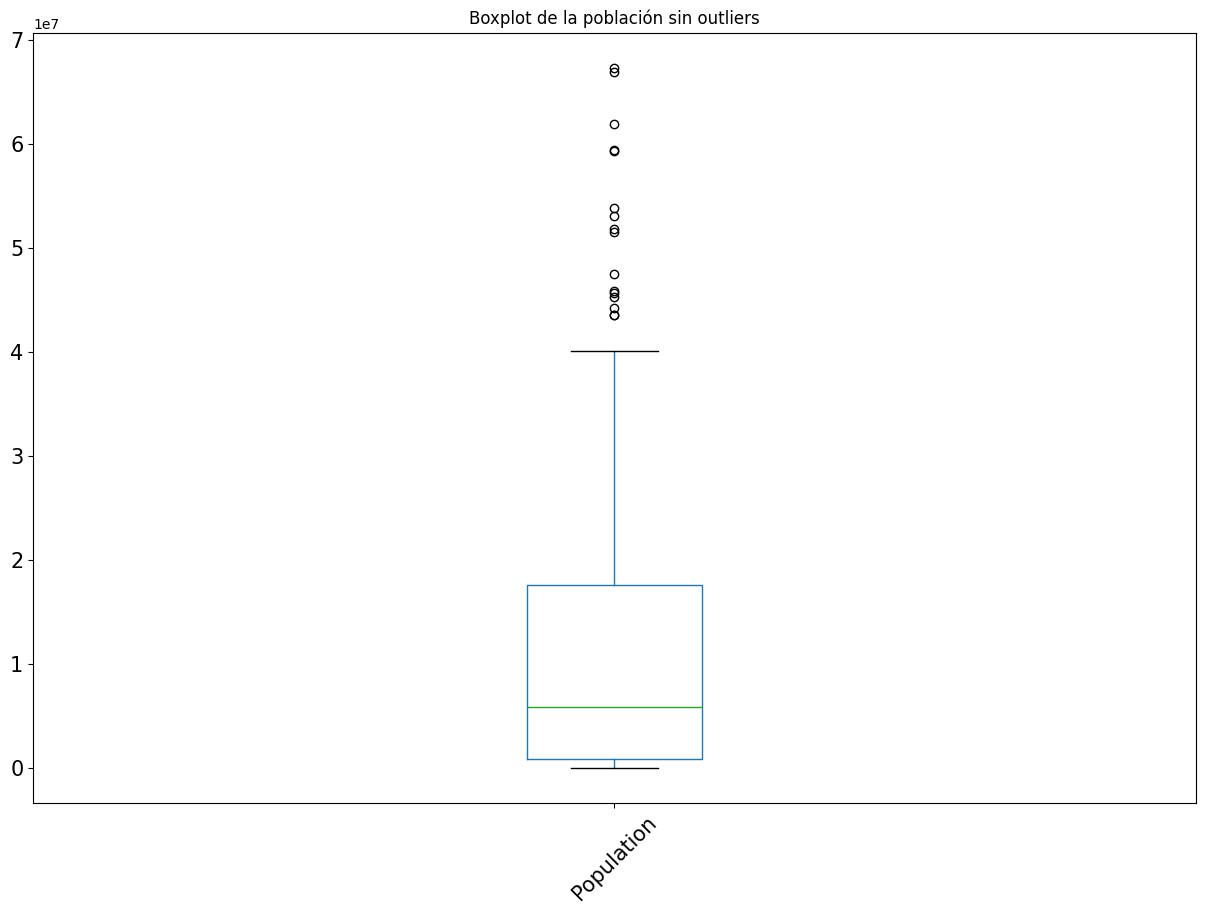

In [34]:
#Plot sin outliers
plt.figure(figsize = (15, 10))
plt.title("Boxplot de la población sin outliers")
popu = mydf_clean_filt_nO[['Population']]
popu.boxplot(grid=False, rot=45, fontsize=15)
plt.show()

Vemos como todo y haber quitado outliers de la población, en el nuevo subdataset seguimos teniendo muchisimos outliers

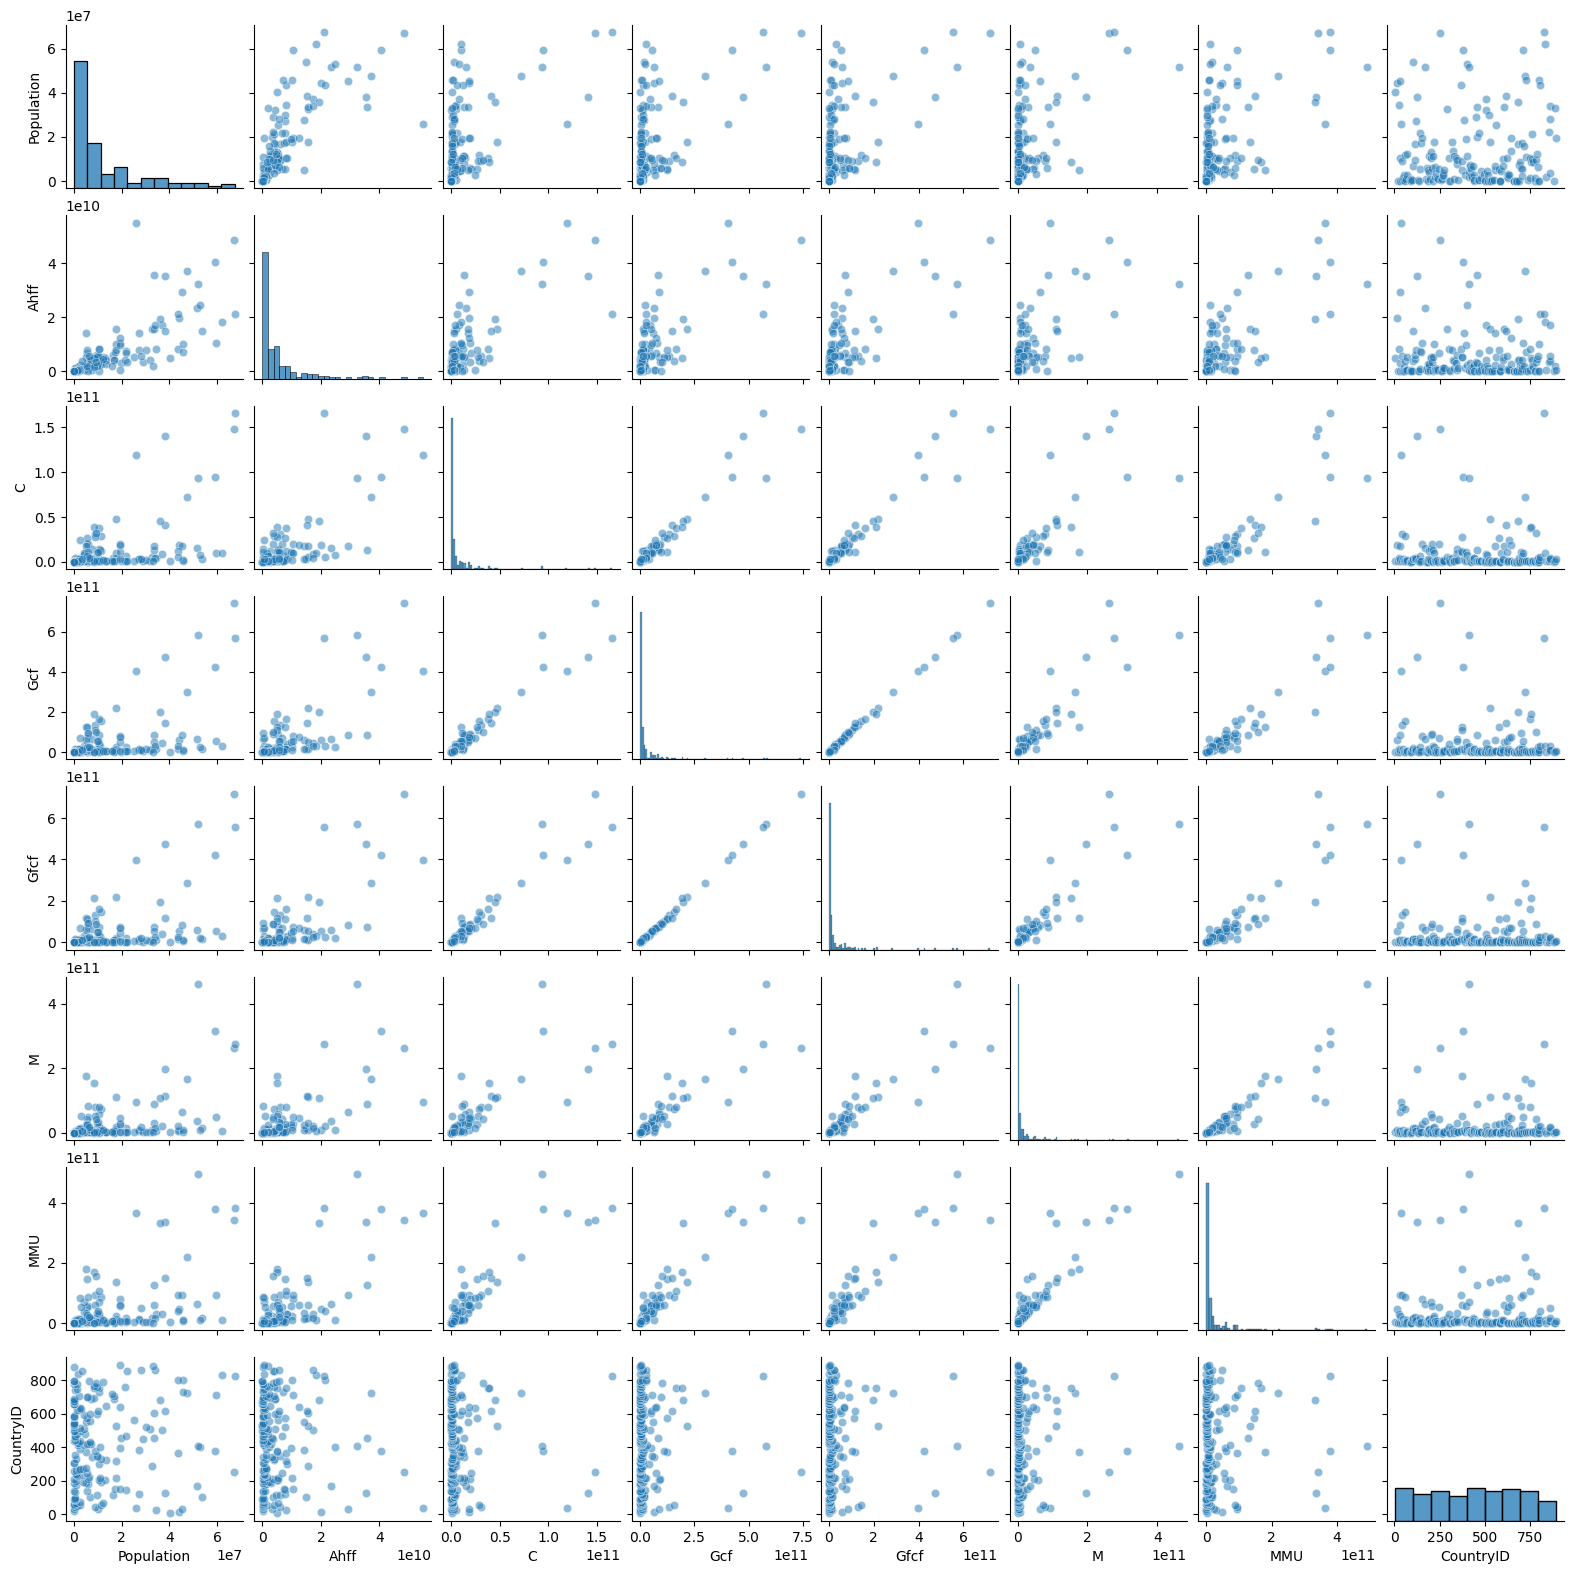

In [35]:
sns.pairplot(mydf_clean_filt_nO, height=2,plot_kws={"alpha": 0.5})

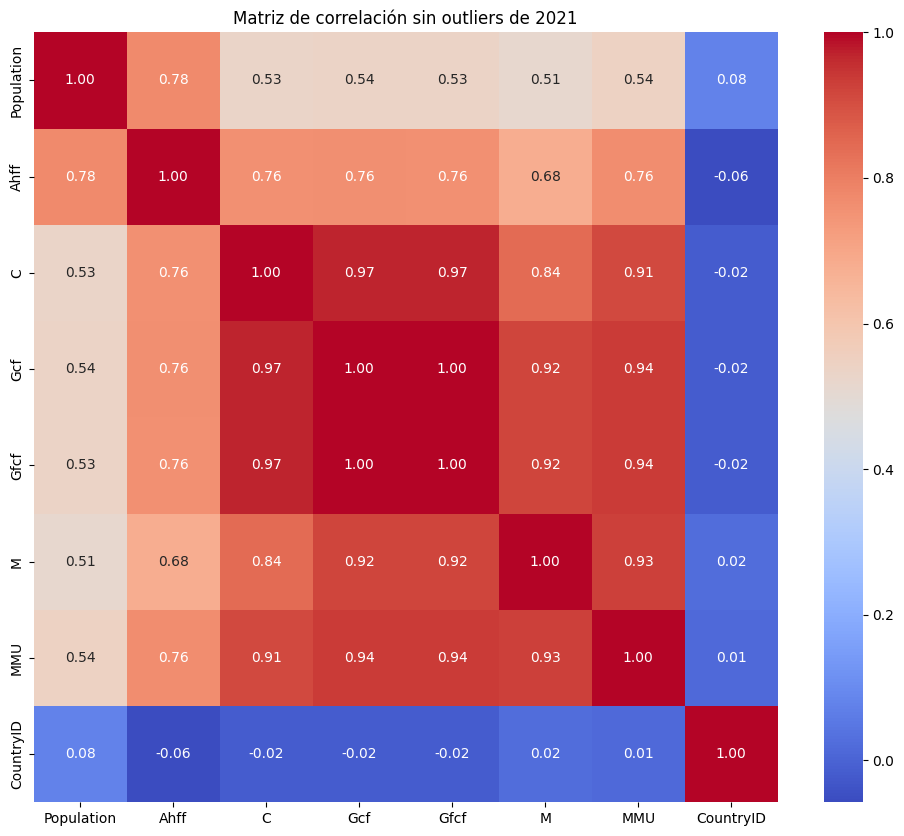

{'CountryID': 'CountryID', 'Country': 'Country', 'Year': 'Year', 'Aer': 'AMA exchange rate', 'Iber': 'IMF based exchange rate', 'Population': 'Population', 'Currency': 'Currency', 'PcG': 'Per capita GNI', 'Ahff': 'Agriculture, hunting, forestry, fishing (ISIC A-B)', 'Cii': 'Changes in inventories', 'C': 'Construction (ISIC F)', 'Eogas': 'Exports of goods and services', 'Fce': 'Final consumption expenditure', 'Ggfce': 'General government final consumption expenditure', 'Gcf': 'Gross capital formation', 'Gfcf': 'Gross fixed capital formation (including Acquisitions less disposals of valuables)', 'Hce': 'Household consumption expenditure (including Non-profit institutions serving households)', 'Iogas': 'Imports of goods and services', 'M': 'Manufacturing (ISIC D)', 'MMU': 'Mining, Manufacturing, Utilities (ISIC C-E)', 'OA': 'Other Activities (ISIC J-P)', 'TVA': 'Total Value Added', 'Tsac': 'Transport, storage and communication (ISIC I)', 'Wrtrah': 'Wholesale, retail trade, restaurants and

In [36]:
#Vemos la matriz de correlación para el año 2021 sin outliers
plt.figure(figsize=(12, 10))
sns.heatmap(mydf_clean_filt_nO.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de correlación sin outliers de 2021')
plt.show()
print(data_names)

Vamos como la variable con más correlación es la Ahff es la que más correlación tiene, así que nos quedaremos con esta para realizar la regresión.

Analizamos los outliers de Ahff

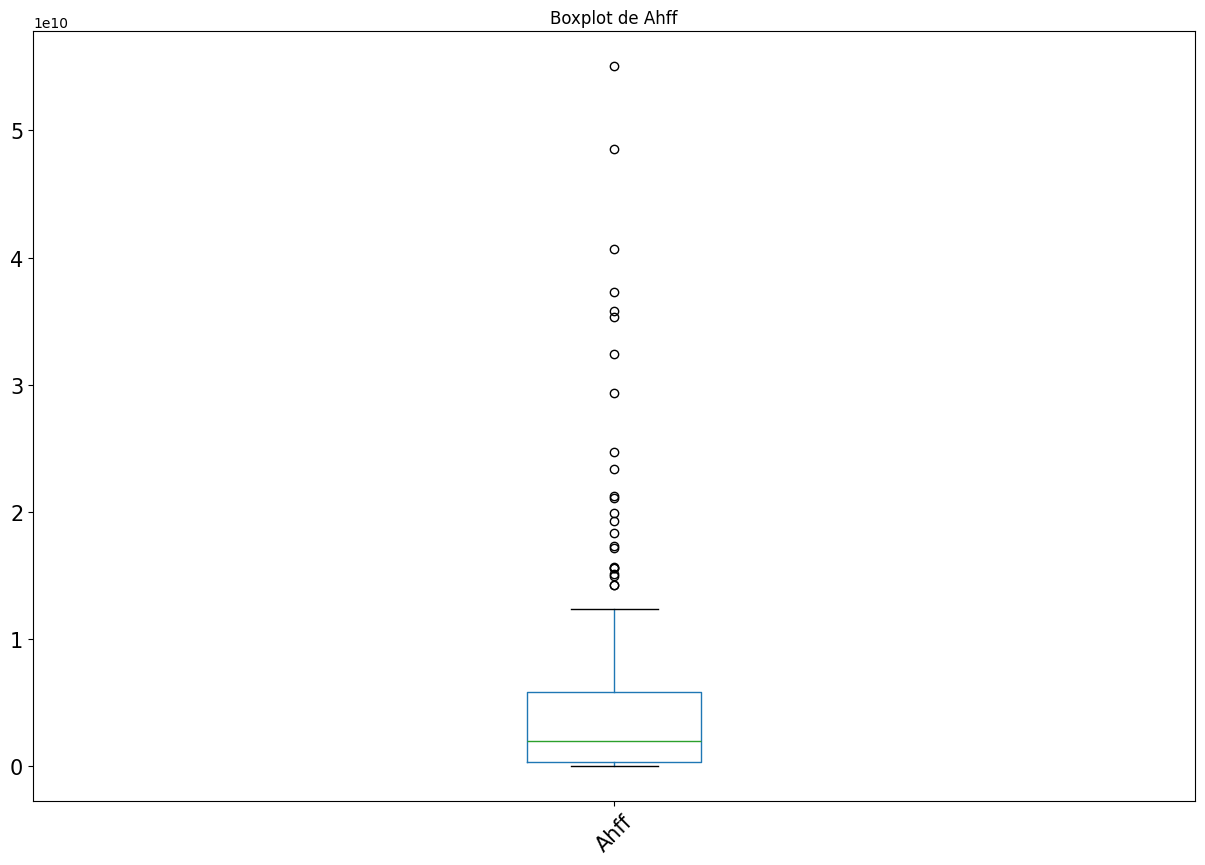

In [37]:
#Plot sin outliers
plt.figure(figsize = (15, 10))
plt.title("Boxplot de Ahff")
popu = mydf_clean_filt_nO[['Ahff']]
popu.boxplot(grid=False, rot=45, fontsize=15)
plt.show()

Seguimos teniendo muchísimos outliers y es que a nivel ecónomico se puede observar como hay una disparidad, todo y haber quitado los primeros outliers de población que como puede ser China e India forman parte de las potencias mundiales y de los países más ricos del mundo.

<Figure size 500x2000 with 0 Axes>

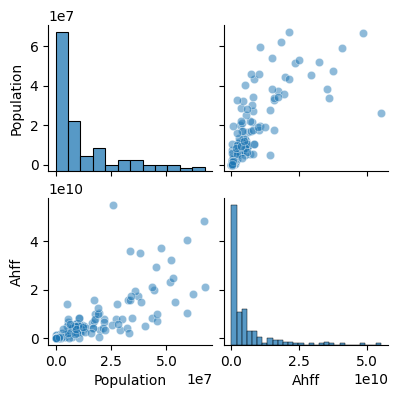

In [38]:
#Escogemos nuestras variables
twoVar = ['Population', 'Ahff']
mydf_clean_filt_nO = mydf_clean_filt_nO[twoVar]

#Hacemos un primer plot para ver que forma tienen nuestros datos
plt.figure(figsize = (5, 20))
sns.pairplot(mydf_clean_filt_nO, height=2, plot_kws={"alpha": 0.5})
plt.show()


Vemos como la forma se parece a una exponencial

In [39]:
mydf_clean_filt_nO.info()

<class 'pandas.core.frame.DataFrame'>
Index: 181 entries, 51 to 10511
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Population  181 non-null    int64  
 1   Ahff        181 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 4.2 KB


In [40]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import seaborn as sns

import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [41]:
mydf_clean_filt_nO = standarize(mydf_clean_filt_nO)

#Muy importante ordenar el vector
X = mydf_clean_filt_nO[['Ahff']]
y = mydf_clean_filt_nO[['Population']]

### Regresión Lineal

In [42]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Algoritmo
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predicción y evaluación
y_pred = regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Mean squared error:', mse)
print('R-squared:', r2)

Mean squared error: 0.2434255308070276
R-squared: 0.5996724223041165


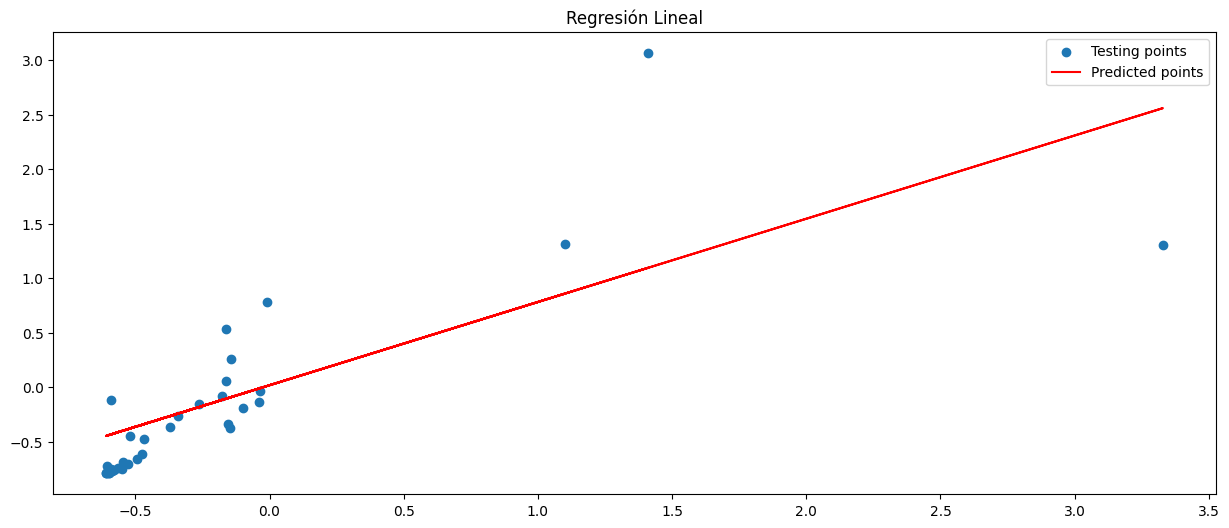

In [43]:
#Pintamos la regresión lineal
plt.figure(figsize = (15, 6))
plt.title('Regresión Lineal')
plt.scatter(X_test, y_test, label = "Testing points")
plt.plot(X_test, y_pred, label = "Predicted points", c = 'r')
plt.legend()
plt.show()
    

Vemos como generaliza bastante bien la regresión lineal, aunque la mayor densidad de los puntos no los esta cogiendo correctamente.


### Regresión polinómica

In [44]:
from sklearn.preprocessing import PolynomialFeatures

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# La regresión polinómica sigue manteniendo una relación 'lineal' por ello definimos un polinomio
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)

# Con los datos preparados para un polinomio, añadimos el entrenamiento para la regresión
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

#Predicciones
y_pred = poly_model.predict(X_test_poly)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Mean squared error:', mse)
print('R-squared:', r2)

Mean squared error: 0.13149928920154721
R-squared: 0.7837416981683909


c:\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


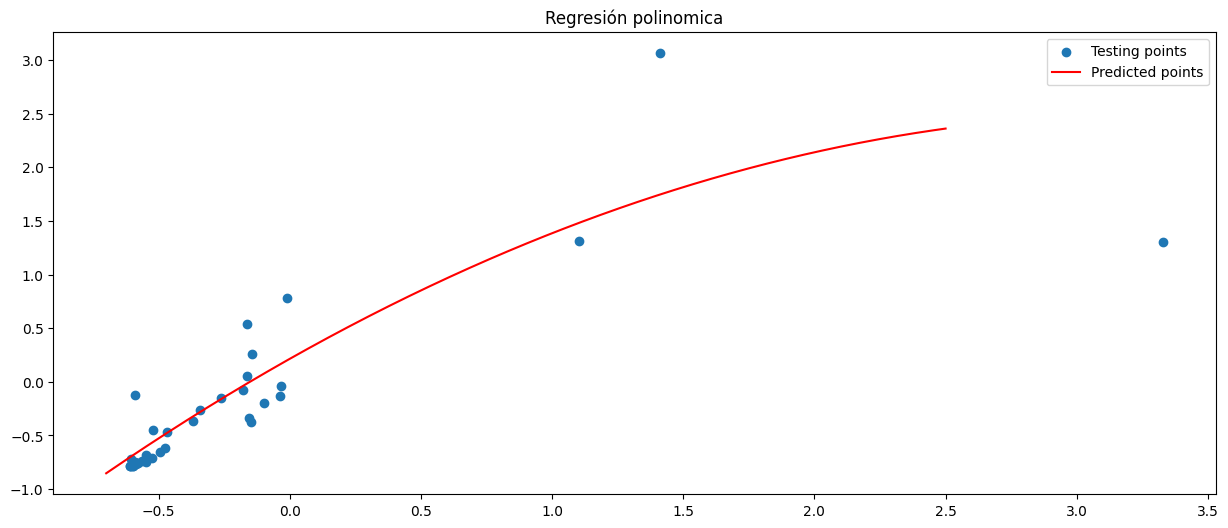

In [45]:
new_x = np.linspace(-0.7, 2.5, 500).reshape(-1, 1)
new_x2 = poly.transform(new_x)
pred = poly_model.predict(new_x2)
plt.figure(figsize = (15, 6))
plt.title("Regresión polinomica")
plt.scatter(X_test, y_test, label = "Testing points")
plt.plot(new_x, pred, label = "Predicted points", c = 'r')
plt.legend()
plt.show()

Y como era de esperar vemos que generaliza mucho mejor la regresión polinómica de grado dos, ya que se corrobora la forma de parábola que cogian nuestros datos. Además de tener un R cuadrado muy superior al de la regresión lineal.

# Conclusiones y mejoras

Durante el transcurso de esta entrega, se ha sido consciente del grado de importancia que han tenido lo outliers. Hasta esta entrega no habían sido tratados. Pero en esta entrega se ha visto como si se tratan, y más cuando se tratan outliers como las potencias mundiales que además destacan mucho del resto, como el conjunto generaliza mejor. 

Además, la presencia de los outliers se ha notado mucho más cuando se ha tratado de demostrar un comportamiento aparentemente lógico, pero que después viendo los datos y la magnitud de estos se ha descubierto que estos no tenían ningún tipo de relación. 

Como conclusiones finales de esta entrega; se deben de analizar siempre los outliers y tratar, siempre aportaran información pero no serán estos los que expliquen el comportamiento genérico del problema. Además, hay que siempre estandarizar los datos, ya que tratando magnitudes como millones y millones de dolares, contra un valor como es la tasa, si no se normaliza, es imposible poder graficar y sacar conclusiones en claro.

Como futuras mejoras, se podrían analizar mejor estas dos últimas regresiones y tratar de ubicar alguno de los países que han quedado fuera de nuestro dataset y ver cual es el error proporcionado y si la regresión esta o no muy alejada.